In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape) # (60000, 28, 28)
print(test_images.shape) # (10000, 28, 28)
print(train_labels) # [5 0 4 ... 5 6 8]
print(test_labels)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [2]:
 train_images = train_images.reshape((60000, 28, 28, 1))
 train_images = train_images.astype('float32')/255
 test_images = test_images.reshape((10000, 28, 28, 1))
 test_images = test_images.astype('float32')/255

 from keras.utils import to_categorical
 train_labels = to_categorical(train_labels)
 test_labels = to_categorical(test_labels)

In [3]:
from keras import layers

inputs = layers.Input(shape=(28, 28, 1))
conv1 = layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
conv2 = layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(conv1)
pool = layers.MaxPooling2D(pool_size=2)(conv2)
drop1 = layers.Dropout(0.25)(pool)
flat = layers.Flatten()(drop1)
dense1 = layers.Dense(128, activation='relu')(flat)
drop2 = layers.Dropout(0.25)(dense1)

outputs = layers.Dense(10, activation='softmax')(drop2)

In [4]:
from keras.models import Model
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['acc'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                             

In [5]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/5
469/469 [==============================] - 93s 193ms/step - loss: 0.2078 - acc: 0.9349 - val_loss: 0.0478 - val_acc: 0.9849
Epoch 2/5
469/469 [==============================] - 84s 180ms/step - loss: 0.0637 - acc: 0.9809 - val_loss: 0.0353 - val_acc: 0.9885
Epoch 3/5
469/469 [==============================] - 86s 183ms/step - loss: 0.0480 - acc: 0.9849 - val_loss: 0.0392 - val_acc: 0.9864
Epoch 4/5
469/469 [==============================] - 86s 183ms/step - loss: 0.0367 - acc: 0.9888 - val_loss: 0.0281 - val_acc: 0.9899
Epoch 5/5
469/469 [==============================] - 85s 180ms/step - loss: 0.0326 - acc: 0.9892 - val_loss: 0.0273 - val_acc: 0.9912


In [11]:
print(history.__doc__)

Callback that records events into a `History` object.

    This callback is automatically applied to
    every Keras model. The `History` object
    gets returned by the `fit` method of models.

    Example:

    >>> model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
    >>> model.compile(tf.keras.optimizers.SGD(), loss='mse')
    >>> history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
    ...                     epochs=10, verbose=1)
    >>> print(history.params)
    {'verbose': 1, 'epochs': 10, 'steps': 1}
    >>> # check the keys of history object
    >>> print(history.history.keys())
    dict_keys(['loss'])

    


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 5s 16ms/step - loss: 0.0273 - acc: 0.9912
test_acc: 0.9911999702453613


In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Accuracy of each epoch:', acc)
epochs = range(1, len(acc) +1)

Accuracy of each epoch: [0.9348999857902527, 0.9808833599090576, 0.9848999977111816, 0.9887999892234802, 0.9891999959945679]


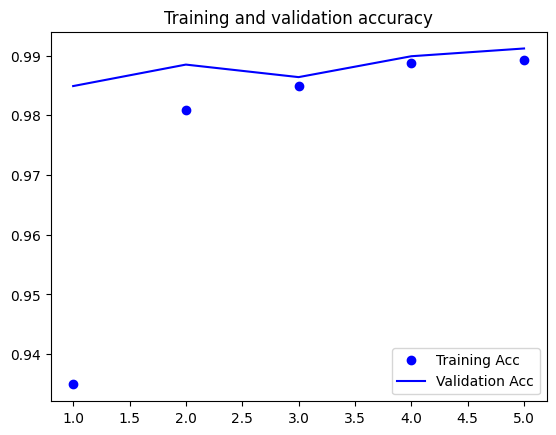

In [13]:
import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()

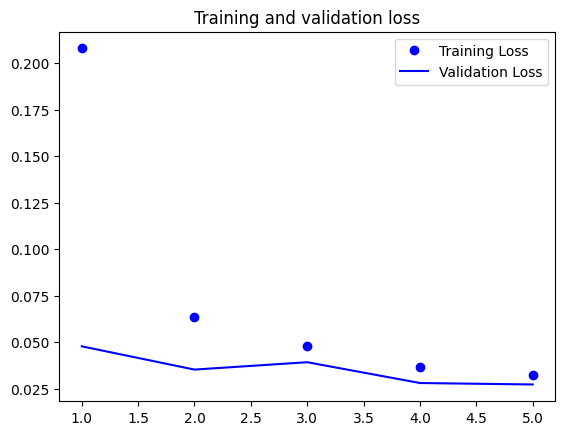

In [14]:
plt.figure() # 새로운 그림을 그린다
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()